## Teorema de Bayes (Teoria)

Nesta sessão iremos abordar sobre os aspectos teóricos do teorema de bayes.


Começando com a ideia de probabilidade condicional, temos que analisar uma árvore de probabilidade. Temos a seguinte imagem guia:

<img src='imagens/bayes.png' />

P(E|F) é chamada de probabilidade a posteriori
P(E) é a probabilidade a priori (independente da ocorrência de outro evento)
P(F|E) é a probabilidade verossimilhança, dado que E ocorreu a probabilidade de F aconcontecer
P(F) é a probabilidade de marginalização

P(F) pode ser tratado como P(F|E)P(E)+ P(F|¬E)P(¬E)

Outro detalhe importante na probabilidade condicional: P(F)P(E|F)= P(F) * P(E)
<h3>Exemplo1:</h3>

imagine que uma determinada doença afete 1 a cada 10.000 pessoas. E imagine que haja um teste para essa doença que
mostra o resultado correto (“doente” se você tem a doença e “não-doente” se não) 99% das vezes.

P(E) ter a doença: 0.0001 ou 0.01% <br>
P(F) diagnóstico correto 0.99 ou 99%

A ideia é construir uma árvore: <br>
<img src='imagens/exemplo1_bayes.jpg' width="400" height="400"/><br>

o teorema de bayes ficaria:

P(E|F)=ter a doença, dado que o diagnóstico foi positivo
P(E|F)= P(E)P(F|E)/( P(F|E)P(E)+ P(F|¬E)P(¬E)

P(E|F)=0.0001 * 0.99 / (0.0001 * 0.99 + 0.01 * 0.9999) = 0.0098 ou 0.98 de ter a doenção dado que o diagnógico é positivo <br>
(0.0001 * 0.99 + 0.01 * 0.9999) = P(F), ou seja do diagósnico ter dado positivo, por que tem a chance da pessoa que não ter a doença ser diagnosticada errada somada
a chance da pessoa que tem a doença e foi diagnosticada corretamente).

<h3>Exemplo2:</h3>

Numa indústria, os parafusos são feitos em duas máquinas: A e B.
A primeira é responsável por 30% da produção e a outra pelo restante.
A máquina A produz 2% de peças defeituosas e a B produz 1%.

Qual a probabilidade ser de A sabendo que é defeituosa?

Temos:

P(A|D)= probabilidade de ser defeituosa e ter vindo de A = P(A)P(D|A) / P(D)<br>
P(A)P(D|A)= P(A) * P(D) probabilidade de ser de A e Ser Defeituosa=0.30 * 0.02 <br>
P(D)= probabilidade marginalizada do Evento =   P(A)P(D|A) + P(¬A)P(D|¬A)= (0.30 * 0.02) + (0.70 * 0.01)<br>

P(¬A)P(¬A|D)= é o mesmo que a peça não ser de A (como só tem B, será B, se houvesse mais, teríamos que somar), logo P(B)P(D|B) 

LOGO P(A|D)= 0.30 * 0.02 / (0.30 * 0.02) + (0.70 * 0.01) =4.61% ou 0.0461

<h3> Exemplo3: </h3>

Um fabricante de sorvetes recebe 20% de todo o leite que utiliza de uma fazenda F1, 30% de outra
fazenda F2 e 50% da fazenda F3. Houve uma fiscalização e observou-se que 20% do leite produzido 
por F1 está com adição de água, enquanto que para F2 e F3 a proporção era de 5% e 2%. Na indústria de
sorvetes os galões de leite são armazenados em um refrigerador sem identificação das fazendas.

Qual a probabilidade de que a amostra adulterada tenha sido obtida do leite fornecido pela fazenda F

P(F1|A)= sabendo que a amostra é adulterada, qual a chance de ser da fazenda F1? 

P(F1|A)= P(F1) * P(A|F1)/ P(A) = P(F1) * P(A|F1)/ P(F1) * P(A|F1) + P(¬F1) * P(A|¬F1)

P(¬F1) * P(A|¬F1)= leites da fazenda f2 e f3 
=> P(F2) * (A|F2) + P(F3) * P(A|F3) = (0.3 * 0.05 ) + (0.5 * 0.02)

Logo,

P(F1|A)= 0.2 * 0.2 / 0.2* 0.2 + (0.3 * 0.05 ) + (0.5 * 0.02) =61.53%




## Algoritmo Naive Bayes

 Naive é de ingênuo, pois ele assume que as features são independentes entre si, ou seja, dado uma variável X (característica) e uma Y, suas amostras xi e yi
 são igualmente importantes para o resultado. <br>
 
 <img src='imagens/tabela_frequencia.png' width="600" height="600" />
 
 -A primeira coisa a se fazer no algoritmo de naive bayes é montar uma tabela de frequência que relaciona cada Característica Preditiva com o resultado de saída. <br>
 -A segunda coisa é utilizar a inserção de um registro de teste e com ele calcular as chances de cada uma das possibilidade <br>
 -Cada possibilidade de saída é calculada pela multiplicação de Prob Yi (queremos prever) * Prob xi * Prob hi ... etc <br>
 -No final dividimos pela soma das probabilidades de cada saída Y, ou seja,  esse somatório é nosso espaço amostral e cada Yi nosso espaço de evento. No caso é o risco de crédito. <br>

## Base de dados

In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns

In [2]:
data_set=pd.read_csv('data_base/credit_data.csv')

In [3]:
data_set.head(5)

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
data_set.shape

(2000, 5)

In [5]:
data_set.describe()#retorna um resumo estatístico do data_set

,i#clientid,income,age,loan,c#default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


### 1° verificar valores nulos no data_set

Alternativas viáveis: <br>

Se a variável é do tipo categório, devemos selecionar um valor modal ou um valor específico. 

Exclusão do registro, se houverem muitos valores ausentes.

Uso de modelos preditivos para substituir esse valor.

Substituir valor numérico por medidas de tendência central, como: média, mediana e moda.

Substituir por 0 (funciona em modelos de regressão e variáveis padronizadas)

In [6]:
data_set.info() #resumo valores não nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [7]:
valores_nulos=data_set[pd.isnull(data_set['age'])]#valores nulos encontrados  

In [8]:
valores_nulos.iloc[:,1:1]#peguei os indices das linhas , agora é usar isso para localizar no data_set e trocarmos pela media

""
28
30
31


In [17]:
valores_nulos.index.values
data_set.loc[valores_nulos.index.values,'age']

28   NaN
30   NaN
31   NaN
Name: age, dtype: float64

In [13]:
valores_nulos

,i#clientid,income,age,loan,c#default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [11]:
valores_nulos.fillna(data_set.median()) # substitui todos os valores nulos pela média, como são 3 e pouca proporcao, nao compensa jogar fora
#se eu quisesse poderia dropar com: dropna

,i#clientid,income,age,loan,c#default
28,29,59417.805406,41.317159,2082.625938,0
30,31,48528.852796,41.317159,6155.784670,0
31,32,23526.302555,41.317159,2862.010139,0


In [12]:
data_set.fillna(data_set.median(),inplace=True) #inplace substitui diretamente no data_set
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         2000 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


C:\Users\WILLIAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '1717'), Text(0, 0, '283')]

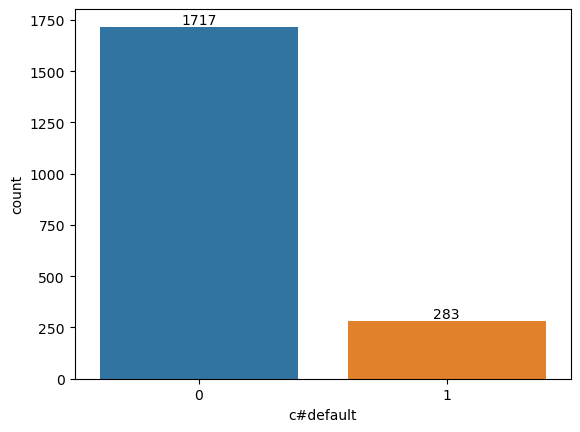

In [13]:
count_classify=sns.countplot(data_set['c#default']);#esse ponto e virgula suprime o aviso
count_classify.bar_label(container=count_classify.containers[0],labels=data_set['c#default'].value_counts(ascending=False).values) #gera os labels

temos uma quantidade desbalanceada de valores de nao pagou= 0 e pagou=1

### 2° verificação de idades menores do que 0


In [14]:
data_set[data_set['age']<=0]

,i#clientid,income,age,loan,c#default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


#### Método 1
método 1 consiste em substituir cada idade pelo seu valor em absoluto

In [15]:
data_set.loc[:,'age']=data_set['age'].abs()
data_set.describe()

,i#clientid,income,age,loan,c#default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.925462,4444.369695,0.141500
std,577.494589,14326.327119,13.257790,3045.410024,0.348624
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,500.750000,32796.459717,29.062492,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.582340,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


#### Método 2
método 2 na mão consiste em localizar os index e trocar os valores dos index multiplicando por -1 para que fiquem positivos

In [16]:
index=data_set[data_set['age']<=0].index.values
index

array([], dtype=int64)

In [17]:
#index=data_set[data_set['age']<=0].iloc[:,0:1].values #aqui temos os ids deles

data_set.loc[index, 'age']=data_set.loc[index, 'age']*-1
data_set.loc[index]

,i#clientid,income,age,loan,c#default


In [18]:
data_set.index.values

array([   0,    1,    2, ..., 1997, 1998, 1999], dtype=int64)

### Separação dos atributos preditores e das respotas

In [19]:
X=data_set.iloc[:,1:4]

In [20]:
X #preditor

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235
...,...,...,...
1995,59221.044874,48.518179,1926.729397
1996,69516.127573,23.162104,3503.176156
1997,44311.449262,28.017167,5522.786693
1998,43756.056605,63.971796,1622.722598


In [21]:
Y=data_set.iloc[:,4:5]

In [22]:
Y #rotulo

,c#default
0,0
1,0
2,0
3,0
4,1
...,...
1995,0
1996,0
1997,1
1998,0


agora devemos tranformar X e Y em arrays 

In [23]:
X=X.values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [24]:
Y=Y.values
Y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

## Separação base de treino e base de teste

o modo de separação será a estratificada, nessa hora é uma boa verificarmos qual o tipo de amostrarem iremos utilizar para fazer a divisão entre base de treinamento e de teste

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test= train_test_split(X,Y,test_size=0.2,stratify=Y)

In [26]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((1600, 3), (400, 3), (1600, 1), (400, 1))

###Teste transformando array para numpy

Aqui eu transformei de numpy para dataframe pandas e renomeei as colunas, também chequei a proporcao

In [27]:
aux_X=pd.DataFrame(X_train)
aux_X.columns=['renda','idade','divida']
aux_X
aux_X.rename(columns={'renda': 'Renda', 'idade':'Idade', 'divida':'Divida'},inplace=True)#Rename so funciona apos nomeacao das colunas
aux_X

,Renda,Idade,Divida
0,55408.705950,43.322807,10300.281248
1,67772.793681,41.515261,5037.933861
2,34722.964831,22.223387,4073.411901
3,48500.268154,61.304800,7054.606149
4,67151.318612,51.655099,3941.698673
...,...,...,...
1595,36017.902747,43.523623,1526.392476
1596,27966.244454,53.700273,4445.203178
1597,69310.957268,42.110609,1590.325804
1598,26037.463644,24.783108,3293.250879


### Verificação se manteve a proporção
aqui fazemos a contagem pra ver se manteve a proporção de pagou ou não pagou a dívida, Y que é da base total tem 85.85% que pagou e a base dividia tem 85.875 que pagou

In [28]:
np.unique(Y, return_counts=True)

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

In [29]:
1717/data_set.shape[0], 283/data_set.shape[0]

(0.8585, 0.1415)

In [30]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([1374,  226], dtype=int64))

In [31]:
1374/y_train.shape[0]

0.85875

In [32]:
226/y_train.shape[0]

0.14125

## Criação e Treinamento do Modelo

In [33]:
from sklearn.naive_bayes import GaussianNB
y_train.ravel().shape

(1600,)

In [34]:
modelo_Naive=GaussianNB()
modelo_Naive.fit(X_train,y_train.ravel()) #encaixei na base de dados

GaussianNB()

In [35]:
previsoes = modelo_Naive.predict(X_test)

In [36]:
previsoes # aqui na base de teste vemos a probabilidade de alguém ter pago ou nao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

temos que comparar com a base de teste para saber a chance

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix #porcentagem acerto

In [38]:
accuracy_score(y_test,previsoes)

0.9075

In [39]:
cm=confusion_matrix(y_test,previsoes)
cm

array([[335,   8],
       [ 29,  28]], dtype=int64)

<AxesSubplot:>

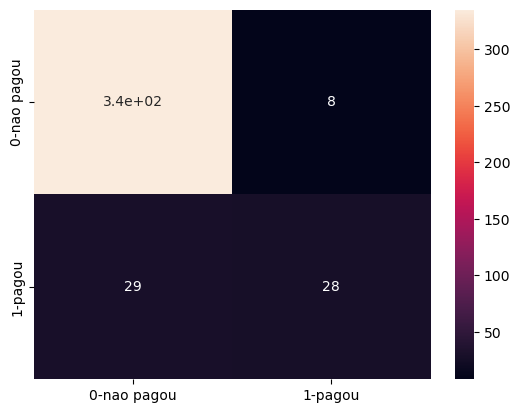

In [40]:
sns.heatmap(cm,annot=True,xticklabels=['0-nao pagou','1-pagou'],yticklabels=['0-nao pagou', '1-pagou'])

In [41]:
np.unique(previsoes, return_counts=True)

(array([0, 1], dtype=int64), array([364,  36], dtype=int64))

In [42]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

Se somarmos os elementos da linha 1 335 + 8 temos os 343 registros que na base de teste não pagaram. 
335 ele de fato acertou e 8 ele errou. Então, até aqui temos 8 como valor errado.

Na linha 2 temos 23+34, logo 57 registros que na base de teste pagaram.
23 ele diz que não pagou, mas de fato pagaram, outros 34 que pagaram ele diz que pagou.

total de erro é 23+8=31, 31/400=7.75% de erro ou seja 92.25% de acerto


percentual de acerto para quem paga 
34/57

percentual de acerta para que nao paga
335/343

possívelmente o viés é porque os dados não estão balanceados.


### MultiClass Naive Bayes
https://towardsdatascience.com/naive-bayes-algorithm-for-classification-bc5e98bff4d7

## over_sampling e under_sampling


Como nossos Dados estão desbalanceados, podemos utilizar-se de 2 técnicas para realizar a amostragem na divisão dos dados. <br>
<img src='imagens/Under_Over_sampling.png' /><br>
Under sampling reduz para dimensão do que tem mais.

Over sampling amplia a dimensão do que tem menos.

<img src='imagens/tomek_link.png' /><br>

Tomek links são os dados que estão próximos dentro da mesma classe, a ideia é remover eles para que fiquem mais espaçados e assim haja maior distância entre os dados (última figura da direita)

<img src='imagens/smote.png' /><br>

A ideia do smote é de gerar cópia com base na distância entre os elementos da classe que possui menos valor, ele pega uma distância de um ponto (verde) e se baseia nos vizinhos para gerar um novo registro

### Tomek link

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from imblearn.under_sampling import TomekLinks

In [54]:
tl = TomekLinks(sampling_strategy='majority') #escolhe para excluir da classe que tem mais, no caso o azul
X_under, y_under = tl.fit_resample(X, Y)

In [55]:
X_under.shape, y_under.shape

((1899, 3), (1899,))

In [56]:
np.unique(y_under,return_counts=True) # excluiu um pouco dos valores

(array([0, 1], dtype=int64), array([1616,  283], dtype=int64))

In [57]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under,y_under,test_size=0.2,stratify=y_under)

In [58]:
modelo_Naive=GaussianNB()
modelo_Naive.fit(X_train_u,y_train_u.ravel()) #encaixei na base de dados

GaussianNB()

In [59]:
previsao_u=modelo_Naive.predict(X_test_u)

In [60]:
accuracy_score(y_test_u,previsao_u)

0.9263157894736842

In [61]:
cm_u=confusion_matrix(y_test_u,previsao_u)
cm_u

array([[335,   8],
       [ 29,  28]], dtype=int64)

### SMOTE Sampling

Agora faremos um over sampling até que seja atingido o número de exemplos que pagaram

In [5]:
from imblearn.over_sampling import SMOTE

In [64]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, Y)

In [65]:
X_over.shape, y_over.shape

((3434, 3), (3434,))

In [67]:
np.unique(y_over, return_counts=True) #

(array([0, 1], dtype=int64), array([1717, 1717], dtype=int64))

In [69]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over,test_size=0.2,stratify=y_over)

In [71]:
modelo_Naive=GaussianNB()
modelo_Naive.fit(X_train_over,y_train_over.ravel()) 

GaussianNB()

In [72]:
previsao_over=modelo_Naive.predict(X_test_over)
accuracy_score(y_test_over,previsao_over)

0.9126637554585153

In [74]:
cm_over=confusion_matrix(y_test_over,previsao_over)
cm_over

array([[301,  42],
       [ 18, 326]], dtype=int64)

<AxesSubplot:>

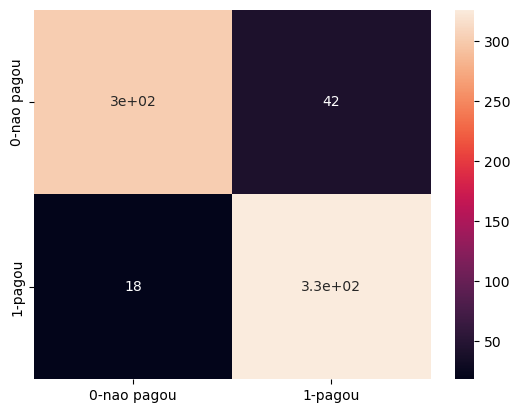

In [75]:
sns.heatmap(cm_over,annot=True,xticklabels=['0-nao pagou','1-pagou'],yticklabels=['0-nao pagou', '1-pagou'])

## ebay_confianca data_set

### Explorando data_set

Aqui eu verifico se há valores negativos, ou valores nulos e tamanho do data_set


In [146]:
ebay_dataset=pd.read_csv('data_base/csv_result-ebay_confianca_completo.csv')

In [147]:
ebay_dataset.head(10)

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom
7,72,0,N,4.834130,0.3,0,2.994083,0.5,0,4.804655,...,0.705489,0.662750,0.719276,0.619855,0.678977,0.763664,0.715188,0.672697,0.817781,Ruim
8,68,0,N,4.583227,0.5,0,3.766229,0.5,1,4.768499,...,0.763725,0.677878,0.737148,0.649325,0.666209,0.769503,0.754634,0.690733,0.818703,Bom
9,142,0,N,4.867134,0.3,0,3.122022,0.5,1,4.700549,...,0.741146,0.643844,0.690222,0.635208,0.619500,0.766466,0.694922,0.673925,0.822170,Bom
10,48,0,N,5.320103,0.5,0,2.779621,0.5,0,5.357514,...,0.753940,0.655293,0.721071,0.663534,0.649143,0.762069,0.662349,0.655148,0.826317,Bom
11,96,0,N,4.593392,0.5,0,3.241813,0.5,0,4.739491,...,0.755873,0.602638,0.708592,0.666241,0.640240,0.772720,0.707340,0.675449,0.812079,Bom


In [148]:
ebay_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5806 entries, 2 to 5807
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   feedbacks                5806 non-null   int64  
 1   reviews                  5806 non-null   int64  
 2   blacklist                5806 non-null   object 
 3   mextraversion            5806 non-null   float64
 4   cextraversion            5806 non-null   float64
 5   sextraversion            5806 non-null   int64  
 6   mneuroticism             5806 non-null   float64
 7   cneuroticism             5806 non-null   float64
 8   sneuroticism             5806 non-null   int64  
 9   mconscientiousness       5806 non-null   float64
 10  cconscientiousness       5806 non-null   float64
 11  sconscientiousness       5806 non-null   int64  
 12  magreeableness           5806 non-null   float64
 13  cagreeableness           5806 non-null   float64
 14  sagreeableness          

In [149]:
ebay_dataset.describe()

,feedbacks,reviews,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,cconscientiousness,...,need_love,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence
count,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,...,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000
mean,65.047365,0.166896,4.786959,0.476266,0.042714,3.049298,0.466845,0.688942,4.772899,0.556545,...,0.741760,0.740528,0.639086,0.707427,0.645731,0.651150,0.757230,0.694574,0.669770,0.815883
std,28.755538,2.801725,0.347073,0.142604,0.202230,0.361792,0.077834,0.462966,0.380572,0.110192,...,0.030950,0.024205,0.029450,0.016710,0.023310,0.024852,0.019115,0.032888,0.024016,0.013363
min,0.000000,0.000000,1.399464,0.100000,0.000000,-1.403793,0.200000,0.000000,2.953039,0.300000,...,0.623295,0.640543,0.530665,0.642212,0.559316,0.522505,0.678664,0.531540,0.562217,0.730698
25%,49.000000,0.000000,4.591643,0.500000,0.000000,2.871910,0.500000,0.000000,4.552426,0.500000,...,0.722020,0.725207,0.619476,0.697073,0.630265,0.632813,0.745268,0.674089,0.654921,0.807388
50%,57.000000,0.000000,4.777159,0.500000,0.000000,3.086165,0.500000,1.000000,4.757340,0.500000,...,0.743327,0.742432,0.637409,0.707229,0.645992,0.649887,0.758688,0.694888,0.672333,0.815776
75%,83.000000,0.000000,4.969744,0.500000,0.000000,3.260629,0.500000,1.000000,4.982377,0.700000,...,0.762141,0.757603,0.657495,0.717282,0.661789,0.668890,0.770028,0.715616,0.686001,0.823872
max,290.000000,56.000000,7.119144,0.900000,1.000000,5.515797,0.900000,1.000000,7.867835,0.900000,...,0.858957,0.827216,0.759828,0.781361,0.747781,0.769267,0.863673,0.818997,0.780665,0.884518


In [150]:
ebay_dataset.shape

(5806, 75)

### Label_Encoding

Coluna Blacklist e Reputation estão como atributos categóricos, como é binário ao invés de usar one_hot_encoder usei diretamente o label_encoding, método da classe preprocessing
cada categoria precisa do seu próprio encoder

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [152]:
le=preprocessing.LabelEncoder()
le2=preprocessing.LabelEncoder()
le.fit(['Ruim','Bom'])
le2.fit(['B','N'])
le.classes_


array(['Bom', 'Ruim'], dtype='<U4')

In [153]:
le.transform(['Bom','Bom','Bom','Ruim']) # Exemplo array de entrada que é transformado

array([0, 0, 0, 1])

In [154]:
ebay_dataset.head(5)

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [155]:
ebay_dataset.loc[:,'blacklist']=le2.transform(ebay_dataset.loc[:,'blacklist'].values) #localiza blacklist e troca pela encoder correspondente convertido em numpy via "values"
ebay_dataset.head(5)

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,1,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,1,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,1,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,1,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,1,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [156]:
ebay_dataset.loc[:,'reputation']=le.transform(ebay_dataset.loc[:,'reputation'].values)
ebay_dataset.head(5)

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,1,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,0
3,0,56,1,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,0
4,0,50,1,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,0
5,72,0,1,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,0
6,76,0,1,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,0


### Separacao Preditor e Classificador

In [157]:
from sklearn.model_selection import train_test_split

In [158]:

X=ebay_dataset.iloc[:,0:74].values

In [159]:
np.unique(X[:,2], return_counts=True)

(array([0., 1.]), array([ 784, 5022], dtype=int64))

In [160]:
Y=ebay_dataset.iloc[:,74:75].values

In [161]:
Y.shape

(5806, 1)

In [162]:
np.unique(Y, return_counts=True) #a muito mais bom do que ruim

(array([0, 1]), array([4299, 1507], dtype=int64))

In [163]:
X

array([[ 0.        , 49.        ,  1.        , ...,  0.64007259,
         0.59803704,  0.82871638],
       [ 0.        , 56.        ,  1.        , ...,  0.64446459,
         0.60304177,  0.80937897],
       [ 0.        , 50.        ,  1.        , ...,  0.65546971,
         0.64504203,  0.8260389 ],
       ...,
       [78.        ,  0.        ,  1.        , ...,  0.69746616,
         0.6739035 ,  0.83207265],
       [95.        ,  0.        ,  1.        , ...,  0.77067732,
         0.71004776,  0.81992383],
       [53.        ,  0.        ,  1.        , ...,  0.62393063,
         0.63312052,  0.79209211]])

In [164]:
np.unique(X[:,2], return_counts=True)

(array([0., 1.]), array([ 784, 5022], dtype=int64))

In [165]:
X_train_forest,X_test_forest, Y_train_forest, Y_test_forest=train_test_split(X,Y,test_size=0.2)
X_train_forest.shape,X_test_forest.shape,Y_train_forest.shape, Y_test_forest.shape

((4644, 74), (1162, 74), (4644, 1), (1162, 1))

### Criacao e Treinamento do Modelo

In [166]:
random_forest=RandomForestClassifier()

In [167]:
random_forest.fit(X_train_forest,Y_train_forest.ravel())

RandomForestClassifier()

In [168]:
previsao_forest=random_forest.predict(X_test_forest)

In [169]:
np.unique(previsao_forest,return_counts=True)

(array([0, 1]), array([1127,   35], dtype=int64))

In [170]:
accuracy_score(Y_test_forest,previsao_forest)

0.7512908777969018

In [171]:
cm_forest=confusion_matrix(Y_test_forest,previsao_forest)
cm_forest

array([[851,  13],
       [276,  22]], dtype=int64)

<AxesSubplot:>

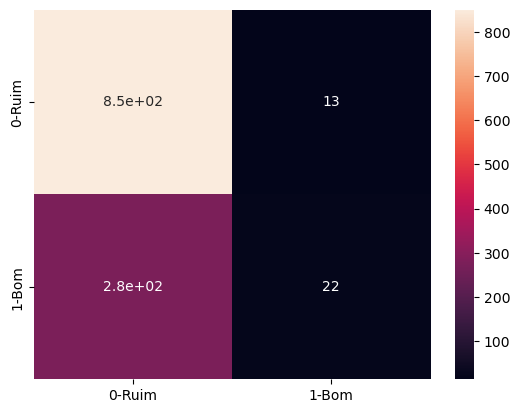

In [177]:
sns.heatmap(cm_forest,annot=True,xticklabels=['0-Ruim','1-Bom'],yticklabels=['0-Ruim','1-Bom'])

In [179]:
np.unique(Y_test_forest,return_counts=True)

(array([0, 1]), array([864, 298], dtype=int64))

### Over_sampling Smote

In [180]:
from imblearn.over_sampling import SMOTE

In [184]:
smote = SMOTE(sampling_strategy='minority')
X_forest_over, Y_forest_over = smote.fit_resample(X, Y)

In [185]:
X_train_forest_over,X_test_forest_over, Y_train_forest_over, Y_test_forest_over=train_test_split(X_forest_over,Y_forest_over,test_size=0.2)
X_train_forest_over.shape,X_test_forest_over.shape, Y_train_forest_over.shape, Y_test_forest_over.shape

((6878, 74), (1720, 74), (6878,), (1720,))

In [186]:
np.unique(Y_forest_over, return_counts=True)

(array([0, 1]), array([4299, 4299], dtype=int64))

In [188]:
np.unique(Y_test_forest,return_counts=True), np.unique(Y_test_forest_over,return_counts=True) #reparar que o último mantem a mesma proporcao agora

((array([0, 1]), array([864, 298], dtype=int64)),
 (array([0, 1]), array([862, 858], dtype=int64)))

In [189]:
random_forest.fit(X_train_forest_over,Y_train_forest_over.ravel())

RandomForestClassifier()

In [190]:
previsao_forest_over=random_forest.predict(X_test_forest_over)

In [191]:
accuracy_score(Y_test_forest_over,previsao_forest_over)

0.8046511627906977

In [192]:
cm_forest_over=confusion_matrix(Y_test_forest_over,previsao_forest_over)
cm_forest_over

array([[701, 161],
       [175, 683]], dtype=int64)

<AxesSubplot:>

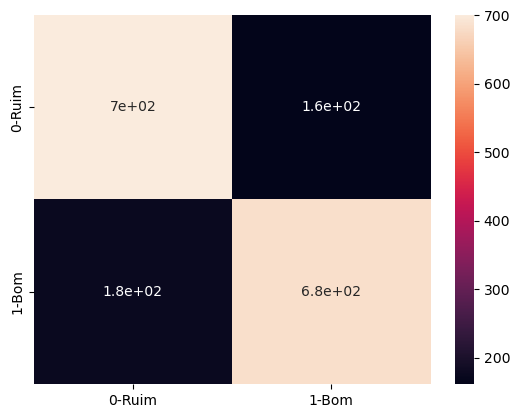

In [193]:
sns.heatmap(cm_forest_over,annot=True,xticklabels=['0-Ruim','1-Bom'],yticklabels=['0-Ruim','1-Bom'])

In [195]:
np.unique(Y_test_forest_over,return_counts=True)

(array([0, 1]), array([862, 858], dtype=int64))